In [1]:
!pip install pydotplus
!pip install gTTS --user
!pip install pytesseract
!pip install --force-reinstall gTTS
!apt-get install python3-gtts
!apt-get install -y tesseract-ocr
!apt-get install tesseract-ocr-ara

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
import pydotplus
from IPython.display import Image, display, HTML
import IPython.display as ipd
from requests import get
import gtts
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt

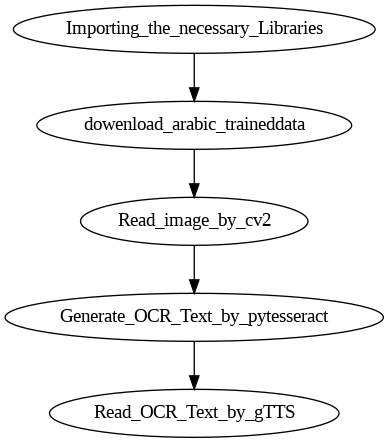

In [6]:
myplan="""digraph {
            Importing_the_necessary_Libraries ->
            dowenload_arabic_traineddata ->
            Read_image_by_cv2 ->
            Generate_OCR_Text_by_pytesseract ->
            Read_OCR_Text_by_gTTS
        }"""
mygraph=pydotplus.graph_from_dot_data(myplan)
mygraph.write_png("myplan.png")
display(Image(filename='./myplan.png'))

In [7]:
def download(url, file_name):
    # open in binary mode
    with open(file_name, "wb") as file:
        # get request
        response = get(url)
        # write to file
        file.write(response.content)

download("https://github.com/tesseract-ocr/tessdata/raw/master/ara.traineddata","ara.traineddata")

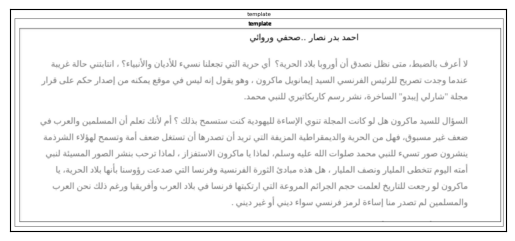

In [8]:
img = cv2.imread('arabic_ocr.png')
GRAY = cv2.COLOR_BGR2GRAY
img = cv2.cvtColor(img, GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

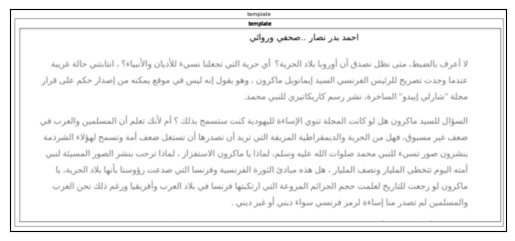

In [24]:
blur = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)

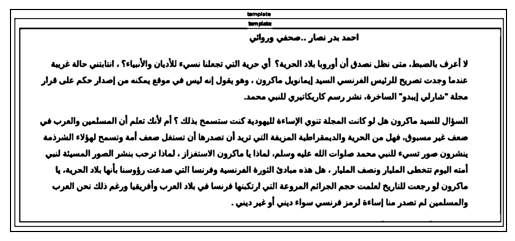

In [35]:
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [17]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'


In [36]:
text = pytesseract.image_to_string(threshold ,  lang='ara',config= ".")
print(text)

أحمد بدر نصار .. صحفي وروائي
لا أعرف بالضبط, متى نظل تصدق أن أوروبا بلاد الحرية؟ أي حرية التي تجعلنا نسيء للأديان والأنبياء؟ , انتابتني حالة غريية

عندما وجدت تصريح للرئيس الفرنسي السيد إيمانويل ماكرون . وهو يقول إنه ليس في موقع يمكنه من إصدار حكم على قرار
مجلة "شارلي إيبدو" الساخرة, نشر رسم كاريكاتيري للنبي محمد.

السؤال للسيد ماكرون هل لو كانت المجلة تنوي الإساءة لليهودية كنت ستسمح بذلك ؟ أم لأنك تعلم أن المستمين والعرب في
ضعف غير مسبوق. فهل من الحرية والديمقراطية المزيفة التي تريد أن تصدرها أن تستغل ضعف أمة وتسمح لهؤلاء الشرذمة
ينشرون صور تسيء للنبي محمد صلوات الله عليه وسلمء لماذايا ماكرون الاستفزاز , لماذا ترحب بنشر الصور المسيئة لنبي
أمته اليوم تتخطى المليار ونصف المليار . هل هذه مبادئ الثورة الفرنسية وفرنسا التي صدعت رؤوسنا بأنها بلاد الحرية, يا
ماكرون لو رجعت للتاريخ لعلمت حجم الجرائم المروعة التي ارتكيتها فرنسا في بلاد العرب وأفريقيا ورغم ذلك نحن العرب
والمسلمين لم تصدر منا إساءة لرمز فرنسي سواء ديني أو غير ديني .

 



In [39]:
voice = gtts.gTTS(text, lang='ar', slow=False)
voice.save("voice.mp3")

In [40]:
ipd.Audio("voice.mp3")